# Анализ загруженности пешеходных дорожек и времени в пути от новых домов до остановок и выходов метро

В данном ноутбуке проводится анализ неопходимого времени чтобы добраться от каждого нового дома в очереди застройки до остановки, а также загруженность пешеходных дорог по которым идут люди.
Для расчета загруженности от каждого дома строится кратчайший путь и на кадом участке этого пути прибаляются люди которые живут в этом доме(квартиры * 3 * 0.60 (взрослые пользующиеся ОТ + дети) * 0.5 (половина на автобусы, половина на метро)

In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install geopandas 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import geopandas as gpd

   EdgeId ST_NAME ST_TYP_BEF ST_NM_BASE ST_NM_CITY  FUNC_CLASS  \
0   13604    None       None       None       None           6   
1   13680    None       None       None       None           6   
2   13686    None       None       None       None           6   
3   13741    None       None       None       None           6   
4   13788    None       None       None       None           6   

                  ROAD_CATEG  F_ZLEV  T_ZLEV      TYPE_LINK  ... AvgSpdDrct  \
0  Внутриквартальные проезды       0       0  Обычное звено  ...         20   
1  Внутриквартальные проезды       0       0  Обычное звено  ...         20   
2  Внутриквартальные проезды       0       0  Обычное звено  ...         20   
3  Внутриквартальные проезды       0       0  Обычное звено  ...         20   
4  Внутриквартальные проезды       0       0  Обычное звено  ...         20   

   MaxSpdRvrs  AvgSpdRvrs  Foot Car  duplicat  payment material   length  \
0          20          20     1   1      None     No

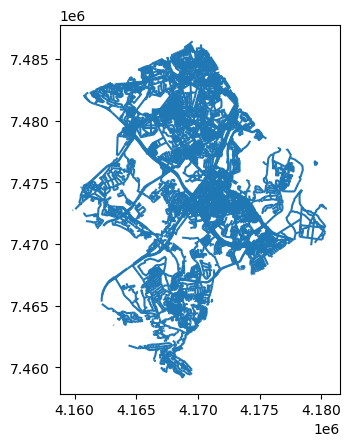

In [63]:
# Путь к Shapefile
shapefile_path = "Векторные данные/Streets_исходные.shp"

# Чтение Shapefile
gdf_strets_original = gpd.read_file(shapefile_path)

# Вывод информации о данных
print(gdf_strets_original.head())
print(gdf_strets_original.crs)  # Вывод системы координат

# Отображение данных на карте
gdf_strets_original.plot()

# Доступ к геометрическим данным
print(gdf_strets_original.geometry.head())

# Доступ к атрибутам
print(gdf_strets_original.head())  # Вывод первых записей

In [10]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27209 entries, 0 to 27208
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EdgeId      27209 non-null  int64   
 1   ST_NAME     3104 non-null   object  
 2   ST_TYP_BEF  3104 non-null   object  
 3   ST_NM_BASE  3104 non-null   object  
 4   ST_NM_CITY  1460 non-null   object  
 5   FUNC_CLASS  27209 non-null  int64   
 6   ROAD_CATEG  27209 non-null  object  
 7   F_ZLEV      27209 non-null  int64   
 8   T_ZLEV      27209 non-null  int64   
 9   TYPE_LINK   27209 non-null  object  
 10  RoadDirect  27209 non-null  object  
 11  RbndStght   17112 non-null  float64 
 12  RbndBck     16430 non-null  float64 
 13  Width       17251 non-null  float64 
 14  IsFerry     27209 non-null  object  
 15  Style       27209 non-null  int64   
 16  U_TURN      27209 non-null  int64   
 17  OriginId    27209 non-null  object  
 18  TrackNames  201 non-null    object  
 

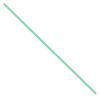

In [13]:
gdf.iloc[0]['geometry']

In [14]:
gdf.iloc[0]

EdgeId                                                    13604
ST_NAME                                                    None
ST_TYP_BEF                                                 None
ST_NM_BASE                                                 None
ST_NM_CITY                                                 None
FUNC_CLASS                                                    6
ROAD_CATEG                            Внутриквартальные проезды
F_ZLEV                                                        0
T_ZLEV                                                        0
TYPE_LINK                                         Обычное звено
RoadDirect                                                  Any
RbndStght                                                   1.0
RbndBck                                                     1.0
Width                                                       6.0
IsFerry                                                       F
Style                                   

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

In [64]:
graph_strets_original = nx.Graph()

# Добавление узлов и ребер в граф
for i, row in gdf_strets_original.iterrows():
    # Получаем координаты начальной и конечной точек линии
    start_coords = row.geometry.coords[0]
    end_coords = row.geometry.coords[-1]

    # Добавляем узлы в граф
    graph_strets_original.add_node(start_coords, x=start_coords[0], y=start_coords[1])
    graph_strets_original.add_node(end_coords, x=end_coords[0], y=end_coords[1])

    # Добавляем ребро в граф
    graph_strets_original.add_edge(start_coords, end_coords, length=row.length)  #  Длина ребра
    #  (Можно добавить другие атрибуты, например, тип дороги, ограничение скорости)

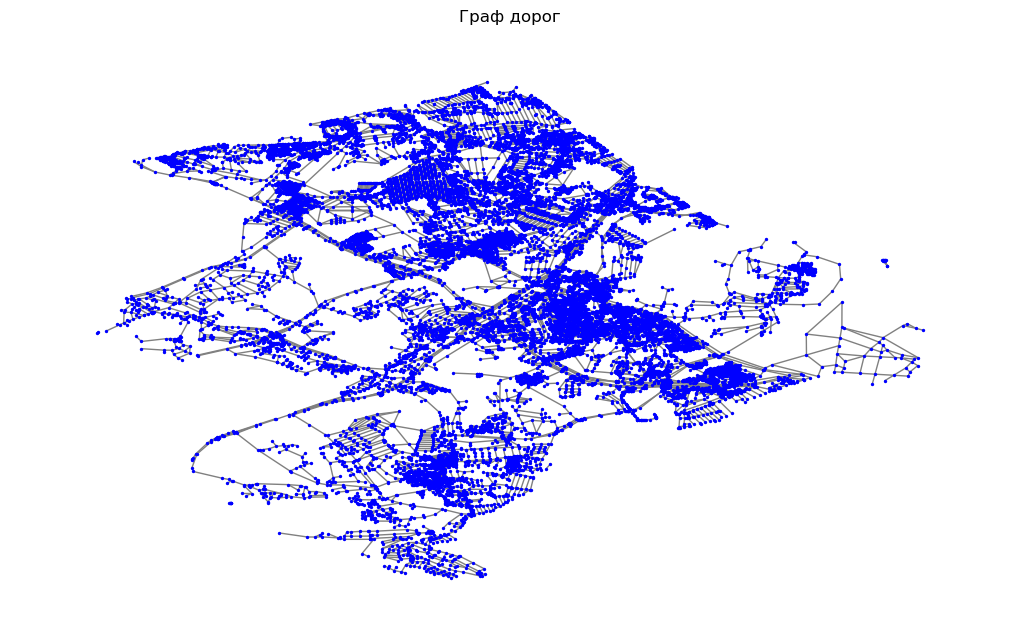

In [65]:
# ... (создание графа как в предыдущем примере) ...

# Отрисовка графа с сохранением расположения
plt.figure(figsize=(10, 6))

# Получение координат узлов из графа 
node_coords = {node: (data['x'], data['y']) for node, data in graph_strets_original.nodes(data=True)}

nx.draw(graph_strets_original, node_coords, with_labels=False, node_size=2, node_color='blue', edge_color='gray')

plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Граф дорог')
plt.show()

<Axes: >

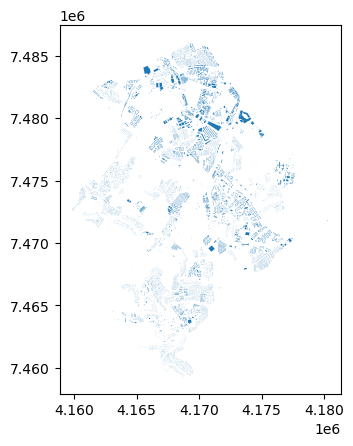

In [69]:
shapefile_path = "Векторные данные/Дома_исходные.shp"

# Чтение Shapefile
gdf_house_original = gpd.read_file(shapefile_path)
gdf_house_original.plot()

# Первая очередь

<Axes: >

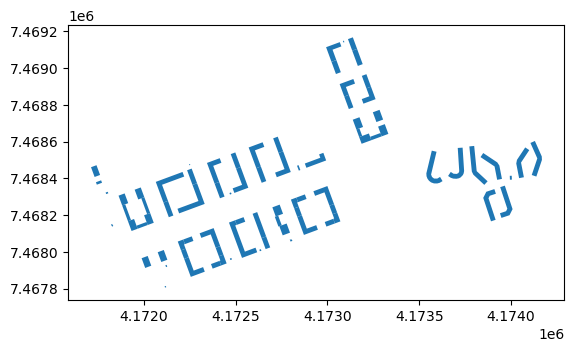

In [70]:
shapefile_path = "Векторные данные/House_1очередь_ЖК.shp"

# Чтение Shapefile
gdf_house_1 = gpd.read_file(shapefile_path)
gdf_house_1.plot()

In [71]:
gdf_house_1

,Type,Purpose,Elevation,Entrances,Apartments,District,Street,Number,geometry
0,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,2 к3,"POLYGON ((4174099.000 7468553.820, 4174054.110..."
1,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к2,"POLYGON ((4173865.000 7468327.020, 4173908.890..."
2,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к1,"POLYGON ((4174008.050 7468232.570, 4173991.510..."
3,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,3 к1,"POLYGON ((4173744.260 7468440.360, 4173741.920..."
4,Жилые дома,Малоэтажный жилой дом,3,3.0,98.0,Коммунарка,Потаповская Роща,2 к4,"POLYGON ((4174166.950 7468519.720, 4174167.880..."
5,Жилые дома,Малоэтажный жилой дом,3,4.0,66.0,Коммунарка,Потаповская Роща,2 к2,"POLYGON ((4173924.730 7468487.080, 4173936.060..."
6,Жилые дома,Малоэтажный жилой дом,3,4.0,96.0,Коммунарка,Потаповская Роща,2 к1,"POLYGON ((4173799.110 7468576.630, 4173812.730..."
7,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,3 к2,"POLYGON ((4173594.110 7468544.830, 4173564.480..."
8,Жилые дома,Жилой дом,18,6.0,399.0,Коммунарка,Александры Монаховой,88 к1,"MULTIPOLYGON (((4172984.270 7468324.110, 41729..."
9,Жилые дома,Жилой дом,18,6.0,382.0,Коммунарка,Александры Монаховой,88 к2,"MULTIPOLYGON (((4172836.300 7468190.050, 41728..."


<Axes: >

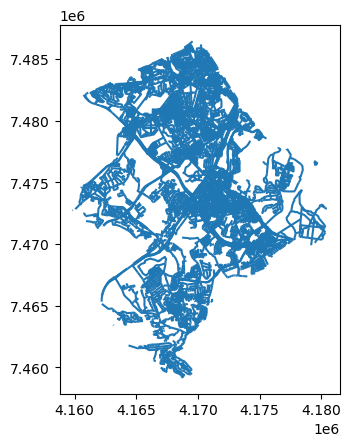

In [165]:
shapefile_path = "Векторные данные/Streets_1очередь.shp"

# Чтение Shapefile
gdf_streets_1 = gpd.read_file(shapefile_path)
gdf_streets_1.plot()

<Axes: >

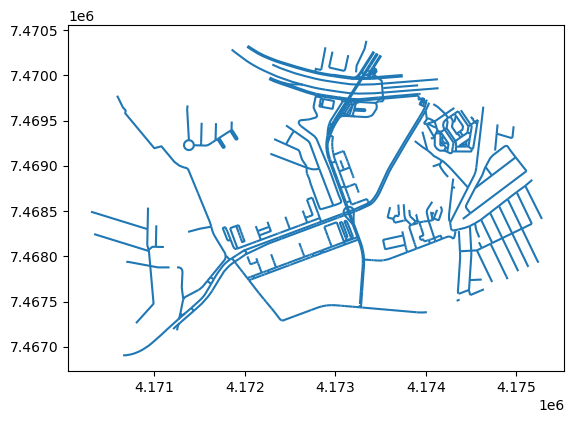

In [404]:
max_distance = 1000  # В метрах

#  Используйте  `houses_gdf.buffer(max_distance)`  для  создания  буфера  вокруг  каждого  дома
houses_buffer = gdf_house_1.buffer(max_distance)

#  Проверьте  пересечение  дорог  с  буфером
roads_near_houses = gdf_streets_1[gdf_streets_1.intersects(houses_buffer.unary_union)]
roads_near_houses.plot()

In [405]:
gdf_house_1

,Type,Purpose,Elevation,Entrances,Apartments,District,Street,Number,geometry
0,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,2 к3,"POLYGON ((4174099.000 7468553.820, 4174054.110..."
1,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к2,"POLYGON ((4173865.000 7468327.020, 4173908.890..."
2,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к1,"POLYGON ((4174008.050 7468232.570, 4173991.510..."
3,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,3 к1,"POLYGON ((4173744.260 7468440.360, 4173741.920..."
4,Жилые дома,Малоэтажный жилой дом,3,3.0,98.0,Коммунарка,Потаповская Роща,2 к4,"POLYGON ((4174166.950 7468519.720, 4174167.880..."
5,Жилые дома,Малоэтажный жилой дом,3,4.0,66.0,Коммунарка,Потаповская Роща,2 к2,"POLYGON ((4173924.730 7468487.080, 4173936.060..."
6,Жилые дома,Малоэтажный жилой дом,3,4.0,96.0,Коммунарка,Потаповская Роща,2 к1,"POLYGON ((4173799.110 7468576.630, 4173812.730..."
7,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,3 к2,"POLYGON ((4173594.110 7468544.830, 4173564.480..."
8,Жилые дома,Жилой дом,18,6.0,399.0,Коммунарка,Александры Монаховой,88 к1,"MULTIPOLYGON (((4172984.270 7468324.110, 41729..."
9,Жилые дома,Жилой дом,18,6.0,382.0,Коммунарка,Александры Монаховой,88 к2,"MULTIPOLYGON (((4172836.300 7468190.050, 41728..."


In [423]:
nearest_road = gpd.sjoin_nearest(gdf_house_1, roads_near_houses, distance_col='distance_road')
nearest_road = nearest_road.rename(columns={'index_right': 'index_road'})
nearest_road.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 54 entries, 0 to 44
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Type           54 non-null     object  
 1   Purpose        54 non-null     object  
 2   Elevation      54 non-null     int64   
 3   Entrances      39 non-null     float64 
 4   Apartments     39 non-null     float64 
 5   District       54 non-null     object  
 6   Street         41 non-null     object  
 7   Number         41 non-null     object  
 8   geometry       54 non-null     geometry
 9   index_road     54 non-null     int64   
 10  ST_NAME        1 non-null      object  
 11  ST_TYP_BEF     1 non-null      object  
 12  ST_NM_BASE     1 non-null      object  
 13  ROAD_CATEG     54 non-null     object  
 14  RoadDirect     54 non-null     object  
 15  RbndStght      22 non-null     float64 
 16  RbndBck        22 non-null     float64 
 17  Width          22 non-null     flo

<Axes: >

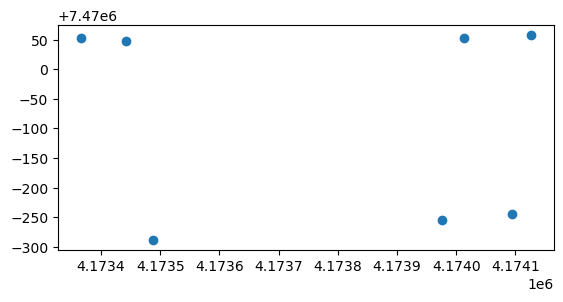

In [424]:
shapefile_path = "Векторные данные/Выходы_метро.shp"

# Чтение Shapefile
gdf_metro = gpd.read_file(shapefile_path)
gdf_metro.plot()

In [425]:
nearest_road = gpd.sjoin_nearest(nearest_road, gdf_metro, distance_col='distance_metro')
nearest_road = nearest_road.rename(columns={'index_right': 'index_metro'})
nearest_road.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 54 entries, 0 to 44
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Type            54 non-null     object  
 1   Purpose         54 non-null     object  
 2   Elevation       54 non-null     int64   
 3   Entrances       39 non-null     float64 
 4   Apartments      39 non-null     float64 
 5   District        54 non-null     object  
 6   Street          41 non-null     object  
 7   Number_left     41 non-null     object  
 8   geometry        54 non-null     geometry
 9   index_road      54 non-null     int64   
 10  ST_NAME         1 non-null      object  
 11  ST_TYP_BEF      1 non-null      object  
 12  ST_NM_BASE      1 non-null      object  
 13  ROAD_CATEG      54 non-null     object  
 14  RoadDirect      54 non-null     object  
 15  RbndStght       22 non-null     float64 
 16  RbndBck         22 non-null     float64 
 17  Width          

<Axes: >

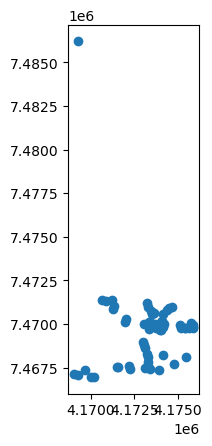

In [426]:
shapefile_path = "Векторные данные/Остановки_ОТ.shp"

# Чтение Shapefile
gdf_ost = gpd.read_file(shapefile_path)
gdf_ost.plot()

In [427]:
nearest_road = gpd.sjoin_nearest(nearest_road, gdf_ost, distance_col='distance_ost')
nearest_road = nearest_road.rename(columns={'index_right': 'index_ost'})
nearest_road.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 54 entries, 0 to 44
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Type            54 non-null     object  
 1   Purpose         54 non-null     object  
 2   Elevation       54 non-null     int64   
 3   Entrances       39 non-null     float64 
 4   Apartments      39 non-null     float64 
 5   District        54 non-null     object  
 6   Street          41 non-null     object  
 7   Number_left     41 non-null     object  
 8   geometry        54 non-null     geometry
 9   index_road      54 non-null     int64   
 10  ST_NAME         1 non-null      object  
 11  ST_TYP_BEF      1 non-null      object  
 12  ST_NM_BASE      1 non-null      object  
 13  ROAD_CATEG      54 non-null     object  
 14  RoadDirect      54 non-null     object  
 15  RbndStght       22 non-null     float64 
 16  RbndBck         22 non-null     float64 
 17  Width          

In [411]:
graph_strets_1 = nx.Graph()

# Добавление узлов и ребер в граф
for i, row in gdf_streets_1.iterrows():
    # Получаем координаты начальной и конечной точек линии
    start_coords = row.geometry.coords[0]
    end_coords = row.geometry.coords[-1]

    # Добавляем узлы в граф
    graph_strets_1.add_node(start_coords, x=start_coords[0], y=start_coords[1])
    graph_strets_1.add_node(end_coords, x=end_coords[0], y=end_coords[1])

    # Добавляем ребро в граф
    graph_strets_1.add_edge(start_coords, end_coords, length=row.geometry.length)  #  Длина ребра
    #  (Можно добавить другие атрибуты, например, тип дороги, ограничение скорости)

In [368]:
f = gdf_ost.iloc[nearest_road.iloc[0]['index_ost']]['geometry']

In [369]:
f.xy[1][0]

7468214.1

In [370]:
f = gdf_streets_1.iloc[nearest_road.iloc[0]['index_road']]['geometry']

In [371]:
f.xy[0][0]

4174074.7

In [372]:
from shapely.geometry import Point

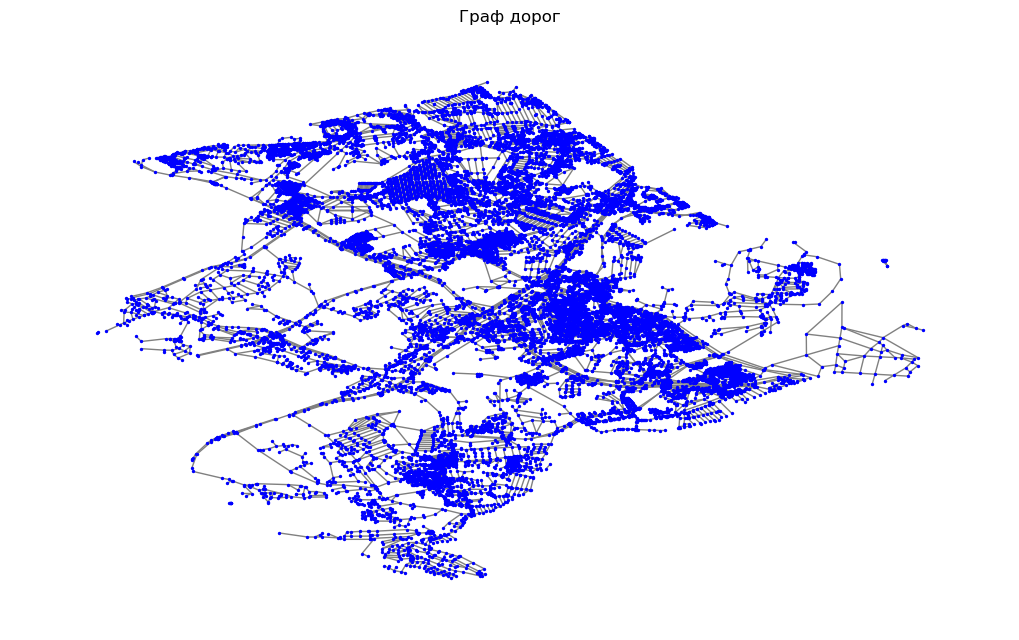

In [412]:
# ... (создание графа как в предыдущем примере) ...

# Отрисовка графа с сохранением расположения
plt.figure(figsize=(10, 6))

# Получение координат узлов из графа 
node_coords = {node: (data['x'], data['y']) for node, data in graph_strets_1.nodes(data=True)}

nx.draw(graph_strets_1, node_coords, with_labels=False, node_size=2, node_color='blue', edge_color='gray')

plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Граф дорог')
plt.show()

In [374]:
# 4. Определите начальный и конечный узлы
f = gdf_streets_1.iloc[nearest_road.iloc[0]['index_road']]['geometry']
start_node  = Point(f.xy[0][0], f.xy[1][0])  # Замените на координаты начального узла
start_node = min(graph_strets_1.nodes, key=lambda node: start_node.distance(Point(graph_strets_1.nodes[node]['x'], graph_strets_1.nodes[node]['y'])))

f = gdf_ost.iloc[nearest_road.iloc[0]['index_ost']]['geometry']
end_node =Point(f.xy[0][0], f.xy[1][0])  # Замените на координаты конечного узла
end_node = min(graph_strets_1.nodes, key=lambda node: end_node.distance(Point(graph_strets_1.nodes[node]['x'], graph_strets_1.nodes[node]['y'])))

In [418]:
# 4. Определите начальный и конечный узлы
f = gdf_streets_1.iloc[nearest_road.iloc[20]['index_road']]['geometry']
start_node  = Point(f.xy[0][0], f.xy[1][0])  # Замените на координаты начального узла
start_node = min(graph_strets_1.nodes, key=lambda node: start_node.distance(Point(graph_strets_1.nodes[node]['x'], graph_strets_1.nodes[node]['y'])))

f = gdf_ost.iloc[nearest_road.iloc[20]['index_ost']]['geometry']
end_node =Point(f.xy[0][0], f.xy[1][0])  # Замените на координаты конечного узла
end_node = min(graph_strets_1.nodes, key=lambda node: end_node.distance(Point(graph_strets_1.nodes[node]['x'], graph_strets_1.nodes[node]['y'])))


# 5. Найдите кратчайший путь
shortest_path = nx.shortest_path(graph_strets_1, source=start_node, target=end_node, weight='length')

# 6. Выведите кратчайший путь
print("Кратчайший путь:", shortest_path)

NetworkXNoPath: No path between (4172640.09, 7468504.48) and (4173058.6, 7468756.67).

In [381]:
nearest_road.iloc[3]['index_road']

27348

In [382]:
nx.shortest_path_length(graph_strets_1, source=start_node, target=end_node, weight='length')/1.25/60 # расстояние делим на 1.25 м/c и на 60 секунд, получаем минуы

5.011144682868032

In [383]:
for i in range(1,len(shortest_path)):
    start_coords = shortest_path[i-1]
    end_coords = shortest_path[i]
    point = Point((start_coords[0]+end_coords[0])/2, (start_coords[1]+end_coords[1])/2)  # Замените на координаты точки
    point_gdf = gpd.GeoDataFrame(geometry=[point])
    point_gdf.crs = "epsg:3857"
    # Используйте sjoin_nearest() для поиска ближайшей дороги
    nearest_road_2 = gpd.sjoin_nearest(point_gdf, gdf_streets_1, how='inner', distance_col='distance')
    print(nearest_road_2.iloc[0]['index_right'])

27347
27360
27366
27367
27368
27334
27315
27370
27369
27340


In [394]:
roads_near_houses.loc[27369]

ST_NAME                                                    None
ST_TYP_BEF                                                 None
ST_NM_BASE                                                 None
ROAD_CATEG                            Внутриквартальные проезды
RoadDirect                                                  Any
RbndStght                                                   1.0
RbndBck                                                     1.0
Width                                                       6.0
MaxSpdDrct                                                   20
AvgSpdDrct                                                   20
MaxSpdRvrs                                                   20
AvgSpdRvrs                                                   20
Foot                                                          1
Car                                                           1
geometry      LINESTRING (4174066.33 7468191.23, 4174093.88 ...
Name: 27369, dtype: object

In [395]:
len(nearest_road)

54

In [413]:
nearest_road.loc[1,'time_to_ost'] = 32
nearest_road

,Type,Purpose,Elevation,Entrances,Apartments,District,Street,Number_left,geometry,index_road,...,index_metro,Number_right,Text,distance_metro,index_ost,TrType,Name,TrStopId,distance_ost,time_to_ost
0,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,2 к3,"POLYGON ((4174099.000 7468553.820, 4174054.110...",27351,...,3,3,Потапово,1181.763630,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,202.283775,NaN
0,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,2 к3,"POLYGON ((4174099.000 7468553.820, 4174054.110...",27352,...,3,3,Потапово,1181.763630,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,202.283775,NaN
0,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,2 к3,"POLYGON ((4174099.000 7468553.820, 4174054.110...",27354,...,3,3,Потапово,1181.763630,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,202.283775,NaN
1,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к2,"POLYGON ((4173865.000 7468327.020, 4173908.890...",27348,...,3,3,Потапово,1405.946896,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,220.454943,32.0
2,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к1,"POLYGON ((4174008.050 7468232.570, 4173991.510...",27347,...,3,3,Потапово,1385.517693,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,125.971398,NaN
3,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,3 к1,"POLYGON ((4173744.260 7468440.360, 4173741.920...",27371,...,2,5,Потапово,1167.512914,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,444.641990,NaN
4,Жилые дома,Малоэтажный жилой дом,3,3.0,98.0,Коммунарка,Потаповская Роща,2 к4,"POLYGON ((4174166.950 7468519.720, 4174167.880...",27349,...,4,4,Потапово,1152.154774,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,195.939540,NaN
5,Жилые дома,Малоэтажный жилой дом,3,4.0,66.0,Коммунарка,Потаповская Роща,2 к2,"POLYGON ((4173924.730 7468487.080, 4173936.060...",27365,...,3,3,Потапово,1214.724163,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,258.476234,NaN
6,Жилые дома,Малоэтажный жилой дом,3,4.0,96.0,Коммунарка,Потаповская Роща,2 к1,"POLYGON ((4173799.110 7468576.630, 4173812.730...",27342,...,2,5,Потапово,1173.050907,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,311.067865,NaN
7,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,3 к2,"POLYGON ((4173594.110 7468544.830, 4173564.480...",27327,...,2,5,Потапово,1163.576525,33,Автобусная остановка,Проспект Куприна,70030076499065625,352.836030,NaN


In [429]:
nearest_road = nearest_road[~nearest_road.index.duplicated(keep='first')]
nearest_road

,Type,Purpose,Elevation,Entrances,Apartments,District,Street,Number_left,geometry,index_road,...,distance_road,index_metro,Number_right,Text,distance_metro,index_ost,TrType,Name,TrStopId,distance_ost
0,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,2 к3,"POLYGON ((4174099.000 7468553.820, 4174054.110...",27351,...,3.591938,3,3,Потапово,1181.763630,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,202.283775
1,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к2,"POLYGON ((4173865.000 7468327.020, 4173908.890...",27348,...,21.524537,3,3,Потапово,1405.946896,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,220.454943
2,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к1,"POLYGON ((4174008.050 7468232.570, 4173991.510...",27347,...,4.934490,3,3,Потапово,1385.517693,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,125.971398
3,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,3 к1,"POLYGON ((4173744.260 7468440.360, 4173741.920...",27371,...,13.081441,2,5,Потапово,1167.512914,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,444.641990
4,Жилые дома,Малоэтажный жилой дом,3,3.0,98.0,Коммунарка,Потаповская Роща,2 к4,"POLYGON ((4174166.950 7468519.720, 4174167.880...",27349,...,7.721448,4,4,Потапово,1152.154774,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,195.939540
5,Жилые дома,Малоэтажный жилой дом,3,4.0,66.0,Коммунарка,Потаповская Роща,2 к2,"POLYGON ((4173924.730 7468487.080, 4173936.060...",27365,...,8.586220,3,3,Потапово,1214.724163,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,258.476234
6,Жилые дома,Малоэтажный жилой дом,3,4.0,96.0,Коммунарка,Потаповская Роща,2 к1,"POLYGON ((4173799.110 7468576.630, 4173812.730...",27342,...,9.768598,2,5,Потапово,1173.050907,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,311.067865
7,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,3 к2,"POLYGON ((4173594.110 7468544.830, 4173564.480...",27327,...,11.223024,2,5,Потапово,1163.576525,33,Автобусная остановка,Проспект Куприна,70030076499065625,352.836030
8,Жилые дома,Жилой дом,18,6.0,399.0,Коммунарка,Александры Монаховой,88 к1,"MULTIPOLYGON (((4172984.270 7468324.110, 41729...",49,...,12.024115,2,5,Потапово,1438.541964,33,Автобусная остановка,Проспект Куприна,70030076499065625,172.201118
9,Жилые дома,Жилой дом,18,6.0,382.0,Коммунарка,Александры Монаховой,88 к2,"MULTIPOLYGON (((4172836.300 7468190.050, 41728...",20,...,5.483400,2,5,Потапово,1526.092416,33,Автобусная остановка,Проспект Куприна,70030076499065625,304.852282


# До автобуса, первая очередь застройки

In [457]:
nearest_road['time_to_ost'] = [0 for i in range(len(nearest_road))]
roads_near_houses['load'] = [0 for i in range(len(roads_near_houses))]
for house in range(len(nearest_road)):
    print(house)
    try:
        # 4. Определите начальный и конечный узлы
        f = gdf_streets_1.iloc[nearest_road.iloc[house]['index_road']]['geometry']
        start_node  = Point(f.xy[0][0], f.xy[1][0])  # Замените на координаты начального узла
        start_node = min(graph_strets_1.nodes, key=lambda node: start_node.distance(Point(graph_strets_1.nodes[node]['x'], graph_strets_1.nodes[node]['y'])))
        
        f = gdf_ost.iloc[nearest_road.iloc[house]['index_ost']]['geometry']
        end_node =Point(f.xy[0][0], f.xy[1][0])  # Замените на координаты конечного узла
        end_node = min(graph_strets_1.nodes, key=lambda node: end_node.distance(Point(graph_strets_1.nodes[node]['x'], graph_strets_1.nodes[node]['y'])))
        
        
        # 5. Найдите кратчайший путь
        shortest_path = nx.shortest_path(graph_strets_1, source=start_node, target=end_node, weight='length')
        
        # 6. Выведите кратчайший путь
        nearest_road.loc[house,'time_to_ost'] = nx.shortest_path_length(graph_strets_1, source=start_node, target=end_node, weight='length')/1.25/60 # расстояние делим на 1.25 м/c и на 60 секунд, получаем минуы
    
        for i in range(1,len(shortest_path)):
            start_coords = shortest_path[i-1]
            end_coords = shortest_path[i]
            point = Point((start_coords[0]+end_coords[0])/2, (start_coords[1]+end_coords[1])/2)  # Замените на координаты точки
            point_gdf = gpd.GeoDataFrame(geometry=[point])
            point_gdf.crs = "epsg:3857"
            # Используйте sjoin_nearest() для поиска ближайшей дороги
            nearest_road_2 = gpd.sjoin_nearest(point_gdf, gdf_streets_1, how='inner', distance_col='distance')
            roads_near_houses.loc[nearest_road_2.iloc[0]['index_right'],'load'] += nearest_road.iloc[house]['Apartments']*3*0.6*0.5
    except:
        nearest_road.loc[house,'time_to_ost'] = -1 

C:\Users\oklad\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


0


C:\Users\oklad\AppData\Local\Temp\ipykernel_35328\2227377456.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.716412456372254' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  nearest_road.loc[house,'time_to_ost'] = nx.shortest_path_length(graph_strets_1, source=start_node, target=end_node, weight='length')/1.25/60 # расстояние делим на 1.25 м/c и на 60 секунд, получаем минуы
C:\Users\oklad\AppData\Local\Temp\ipykernel_35328\2227377456.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '77.39999999999999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  roads_near_houses.loc[nearest_road_2.iloc[0]['index_right'],'load'] += nearest_road.iloc[house]['Apartments']*3*0.6*0.5


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


In [458]:
#максимальная загруженность
roads_near_houses[roads_near_houses['load']>0]['load'].max()

1239.3

In [459]:
#минимальная загруженность
roads_near_houses[roads_near_houses['load']>0]['load'].min()

77.39999999999999

In [460]:
#медианная загруженность
roads_near_houses[roads_near_houses['load']>0]['load'].median()

145.79999999999998

In [461]:
roads_near_houses

,ST_NAME,ST_TYP_BEF,ST_NM_BASE,ROAD_CATEG,RoadDirect,RbndStght,RbndBck,Width,MaxSpdDrct,AvgSpdDrct,MaxSpdRvrs,AvgSpdRvrs,Foot,Car,geometry,load
0,None,None,None,Прочие улицы города,T,1.0,1.0,6.0,0,0,60,51,1,1,"LINESTRING (4172103.980 7467757.540, 4172074.7...",NaN
1,Проектируемый 7048-й проезд,проезд,Проектируемый 7048-й,Магистральные улицы города,Any,2.0,2.0,12.0,60,60,60,60,1,1,"LINESTRING (4172045.700 7467735.850, 4172027.7...",0.0
2,None,None,None,Прочие улицы города,F,1.0,1.0,6.0,40,40,0,0,1,1,"LINESTRING (4172103.980 7467757.540, 4172184.0...",0.0
3,None,None,None,Магистральные улицы города,F,2.0,1.0,9.0,60,60,0,0,1,1,"LINESTRING (4171887.340 7467940.430, 4171866.1...",0.0
4,None,None,None,Прочие улицы города,T,1.0,1.0,6.0,0,0,40,33,1,1,"LINESTRING (4173106.260 7468130.300, 4173008.2...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27516,None,None,None,Внутриквартальные проезды,Any,1.0,1.0,6.0,20,20,20,20,1,1,"LINESTRING (4172971.120 7469307.970, 4172973.6...",0.0
27517,None,None,None,Внутриквартальные проезды,Any,1.0,1.0,6.0,20,20,20,20,1,1,"LINESTRING (4173175.720 7468579.930, 4173176.1...",0.0
27518,None,None,None,Пешеходные дорожки,Any,NaN,NaN,NaN,4,4,4,4,1,0,"LINESTRING (4173069.220 7469154.760, 4173043.0...",NaN
27519,None,None,None,Пешеходные дорожки,Any,NaN,NaN,NaN,4,4,4,4,1,0,"LINESTRING (4173043.040 7469144.690, 4172981.5...",NaN


In [462]:
# медианное время в пути
nearest_road[nearest_road['time_to_ost']>0]['time_to_ost'].median()

5.423785013828594

In [463]:
# минимальное время в пути
nearest_road[nearest_road['time_to_ost']>0]['time_to_ost'].min()

1.4691098556163213

In [464]:
# максимальное время в пути
nearest_road[nearest_road['time_to_ost']>0]['time_to_ost'].max()

42.23711277206217

# До метро + до автобуса, первая очередь

In [465]:
nearest_road['time_to_sub'] = [0 for i in range(len(nearest_road))]
for house in range(len(nearest_road)):
    print(house)
    try:
        # 4. Определите начальный и конечный узлы
        f = gdf_streets_1.iloc[nearest_road.iloc[house]['index_road']]['geometry']
        start_node  = Point(f.xy[0][0], f.xy[1][0])  # Замените на координаты начального узла
        start_node = min(graph_strets_1.nodes, key=lambda node: start_node.distance(Point(graph_strets_1.nodes[node]['x'], graph_strets_1.nodes[node]['y'])))
        
        f = gdf_metro.iloc[nearest_road.iloc[house]['index_ost']]['geometry']
        end_node =Point(f.xy[0][0], f.xy[1][0])  # Замените на координаты конечного узла
        end_node = min(graph_strets_1.nodes, key=lambda node: end_node.distance(Point(graph_strets_1.nodes[node]['x'], graph_strets_1.nodes[node]['y'])))
        
        
        # 5. Найдите кратчайший путь
        shortest_path = nx.shortest_path(graph_strets_1, source=start_node, target=end_node, weight='length')
        
        # 6. Выведите кратчайший путь
        nearest_road.loc[house,'time_to_sub'] = nx.shortest_path_length(graph_strets_1, source=start_node, target=end_node, weight='length')/1.25/60 # расстояние делим на 1.25 м/c и на 60 секунд, получаем минуы
    
        for i in range(1,len(shortest_path)):
            start_coords = shortest_path[i-1]
            end_coords = shortest_path[i]
            point = Point((start_coords[0]+end_coords[0])/2, (start_coords[1]+end_coords[1])/2)  # Замените на координаты точки
            point_gdf = gpd.GeoDataFrame(geometry=[point])
            point_gdf.crs = "epsg:3857"
            # Используйте sjoin_nearest() для поиска ближайшей дороги
            nearest_road_2 = gpd.sjoin_nearest(point_gdf, gdf_streets_1, how='inner', distance_col='distance')
            roads_near_houses.loc[nearest_road_2.iloc[0]['index_right'],'load'] += nearest_road.iloc[house]['Apartments']*3*0.6*0.5
    except:
        nearest_road.loc[house,'time_to_ost'] = -1 

C:\Users\oklad\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


C:\Users\oklad\AppData\Local\Temp\ipykernel_35328\2538555461.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31.092789725814594' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  nearest_road.loc[house,'time_to_sub'] = nx.shortest_path_length(graph_strets_1, source=start_node, target=end_node, weight='length')/1.25/60 # расстояние делим на 1.25 м/c и на 60 секунд, получаем минуы


26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


In [466]:
roads_near_houses[roads_near_houses['load']>0]['load'].max()

1239.3

In [467]:
roads_near_houses[roads_near_houses['load']>0]['load'].min()

77.39999999999999

In [468]:
roads_near_houses[roads_near_houses['load']>0]['load'].median()

154.79999999999998

In [452]:
roads_near_houses

,ST_NAME,ST_TYP_BEF,ST_NM_BASE,ROAD_CATEG,RoadDirect,RbndStght,RbndBck,Width,MaxSpdDrct,AvgSpdDrct,MaxSpdRvrs,AvgSpdRvrs,Foot,Car,geometry,load
0,None,None,None,Прочие улицы города,T,1.0,1.0,6.0,0,0,60,51,1,1,"LINESTRING (4172103.980 7467757.540, 4172074.7...",0.0
1,Проектируемый 7048-й проезд,проезд,Проектируемый 7048-й,Магистральные улицы города,Any,2.0,2.0,12.0,60,60,60,60,1,1,"LINESTRING (4172045.700 7467735.850, 4172027.7...",0.0
2,None,None,None,Прочие улицы города,F,1.0,1.0,6.0,40,40,0,0,1,1,"LINESTRING (4172103.980 7467757.540, 4172184.0...",0.0
3,None,None,None,Магистральные улицы города,F,2.0,1.0,9.0,60,60,0,0,1,1,"LINESTRING (4171887.340 7467940.430, 4171866.1...",0.0
4,None,None,None,Прочие улицы города,T,1.0,1.0,6.0,0,0,40,33,1,1,"LINESTRING (4173106.260 7468130.300, 4173008.2...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27516,None,None,None,Внутриквартальные проезды,Any,1.0,1.0,6.0,20,20,20,20,1,1,"LINESTRING (4172971.120 7469307.970, 4172973.6...",NaN
27517,None,None,None,Внутриквартальные проезды,Any,1.0,1.0,6.0,20,20,20,20,1,1,"LINESTRING (4173175.720 7468579.930, 4173176.1...",0.0
27518,None,None,None,Пешеходные дорожки,Any,NaN,NaN,NaN,4,4,4,4,1,0,"LINESTRING (4173069.220 7469154.760, 4173043.0...",NaN
27519,None,None,None,Пешеходные дорожки,Any,NaN,NaN,NaN,4,4,4,4,1,0,"LINESTRING (4173043.040 7469144.690, 4172981.5...",NaN


In [469]:
nearest_road[nearest_road['time_to_ost']>0]['time_to_ost']

Series([], Name: time_to_ost, dtype: float64)

In [456]:
nearest_road

,Type,Purpose,Elevation,Entrances,Apartments,District,Street,Number_left,geometry,index_road,...,index_metro,Number_right,Text,distance_metro,index_ost,TrType,Name,TrStopId,distance_ost,time_to_ost
0,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,2 к3,"POLYGON ((4174099.000 7468553.820, 4174054.110...",27351,...,3,3,Потапово,1181.763630,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,202.283775,-1.0
1,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к2,"POLYGON ((4173865.000 7468327.020, 4173908.890...",27348,...,3,3,Потапово,1405.946896,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,220.454943,-1.0
2,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к1,"POLYGON ((4174008.050 7468232.570, 4173991.510...",27347,...,3,3,Потапово,1385.517693,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,125.971398,-1.0
3,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,3 к1,"POLYGON ((4173744.260 7468440.360, 4173741.920...",27371,...,2,5,Потапово,1167.512914,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,444.641990,-1.0
4,Жилые дома,Малоэтажный жилой дом,3,3.0,98.0,Коммунарка,Потаповская Роща,2 к4,"POLYGON ((4174166.950 7468519.720, 4174167.880...",27349,...,4,4,Потапово,1152.154774,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,195.939540,-1.0
5,Жилые дома,Малоэтажный жилой дом,3,4.0,66.0,Коммунарка,Потаповская Роща,2 к2,"POLYGON ((4173924.730 7468487.080, 4173936.060...",27365,...,3,3,Потапово,1214.724163,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,258.476234,-1.0
6,Жилые дома,Малоэтажный жилой дом,3,4.0,96.0,Коммунарка,Потаповская Роща,2 к1,"POLYGON ((4173799.110 7468576.630, 4173812.730...",27342,...,2,5,Потапово,1173.050907,9,Автобусная остановка,Микрорайон Бутовские аллеи,70030076945308810,311.067865,-1.0
7,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,3 к2,"POLYGON ((4173594.110 7468544.830, 4173564.480...",27327,...,2,5,Потапово,1163.576525,33,Автобусная остановка,Проспект Куприна,70030076499065625,352.836030,-1.0
8,Жилые дома,Жилой дом,18,6.0,399.0,Коммунарка,Александры Монаховой,88 к1,"MULTIPOLYGON (((4172984.270 7468324.110, 41729...",49,...,2,5,Потапово,1438.541964,33,Автобусная остановка,Проспект Куприна,70030076499065625,172.201118,-1.0
9,Жилые дома,Жилой дом,18,6.0,382.0,Коммунарка,Александры Монаховой,88 к2,"MULTIPOLYGON (((4172836.300 7468190.050, 41728...",20,...,2,5,Потапово,1526.092416,33,Автобусная остановка,Проспект Куприна,70030076499065625,304.852282,-1.0


# Вторая очерердь 

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 139 entries, 0 to 125
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Type           139 non-null    object  
 1   Purpose        139 non-null    object  
 2   Elevation      139 non-null    int64   
 3   Entrances      89 non-null     float64 
 4   Apartments     89 non-null     float64 
 5   District       139 non-null    object  
 6   Street         104 non-null    object  
 7   Number         104 non-null    object  
 8   geometry       139 non-null    geometry
 9   index_road     139 non-null    int64   
 10  ST_NAME        5 non-null      object  
 11  ST_TYP_BEF     5 non-null      object  
 12  ST_NM_BASE     5 non-null      object  
 13  ROAD_CATEG     139 non-null    object  
 14  RoadDirect     139 non-null    object  
 15  RbndStght      65 non-null     float64 
 16  RbndBck        65 non-null     float64 
 17  Width          65 non-null     f

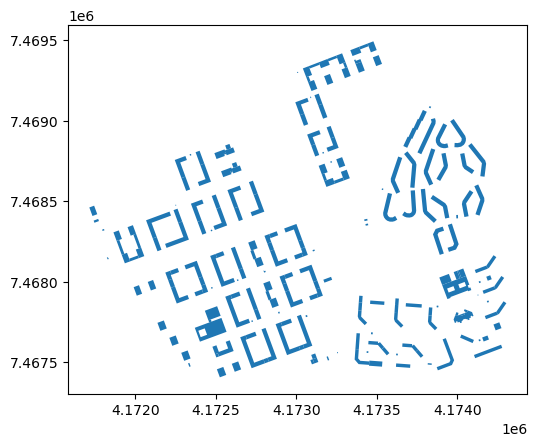

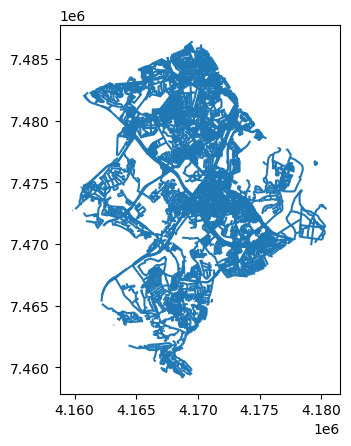

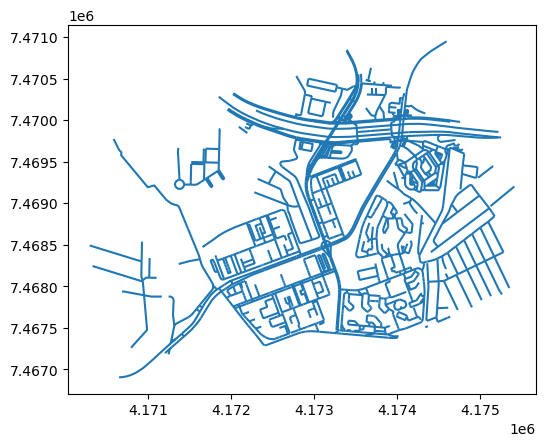

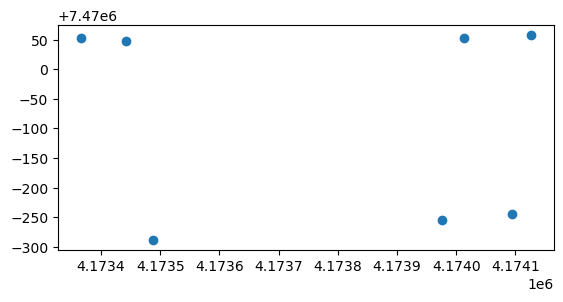

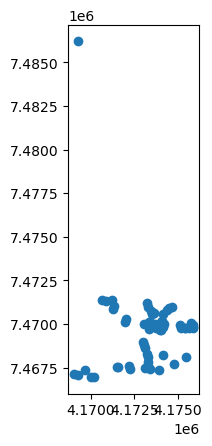

In [484]:
shapefile_path = "Векторные данные/House_2очередь_ЖК.shp"

# Чтение Shapefile
gdf_house_1 = gpd.read_file(shapefile_path)
gdf_house_1.plot()

shapefile_path = "Векторные данные/Streets_2очередь.shp"

# Чтение Shapefile
gdf_streets_1 = gpd.read_file(shapefile_path)
gdf_streets_1.plot()

max_distance = 1000  # В метрах

#  Используйте  `houses_gdf.buffer(max_distance)`  для  создания  буфера  вокруг  каждого  дома
houses_buffer = gdf_house_1.buffer(max_distance)

#  Проверьте  пересечение  дорог  с  буфером
roads_near_houses = gdf_streets_1[gdf_streets_1.intersects(houses_buffer.unary_union)]
roads_near_houses.plot()

nearest_road = gpd.sjoin_nearest(gdf_house_1, roads_near_houses, distance_col='distance_road')
nearest_road = nearest_road.rename(columns={'index_right': 'index_road'})
nearest_road.info()

shapefile_path = "Векторные данные/Выходы_метро.shp"

# Чтение Shapefile
gdf_metro = gpd.read_file(shapefile_path)
gdf_metro.plot()

nearest_road = gpd.sjoin_nearest(nearest_road, gdf_metro, distance_col='distance_metro')
nearest_road = nearest_road.rename(columns={'index_right': 'index_metro'})
nearest_road.info()


shapefile_path = "Векторные данные/Остановки_ОТ.shp"

# Чтение Shapefile
gdf_ost = gpd.read_file(shapefile_path)
gdf_ost.plot()


nearest_road = gpd.sjoin_nearest(nearest_road, gdf_ost, distance_col='distance_ost')
nearest_road = nearest_road.rename(columns={'index_right': 'index_ost'})
nearest_road.info()

In [485]:
graph_strets_1 = nx.Graph()

# Добавление узлов и ребер в граф
for i, row in gdf_streets_1.iterrows():
    # Получаем координаты начальной и конечной точек линии
    start_coords = row.geometry.coords[0]
    end_coords = row.geometry.coords[-1]

    # Добавляем узлы в граф
    graph_strets_1.add_node(start_coords, x=start_coords[0], y=start_coords[1])
    graph_strets_1.add_node(end_coords, x=end_coords[0], y=end_coords[1])

    # Добавляем ребро в граф
    graph_strets_1.add_edge(start_coords, end_coords, length=row.geometry.length)  #  Длина ребра
    #  (Можно добавить другие атрибуты, например, тип дороги, ограничение скорости)

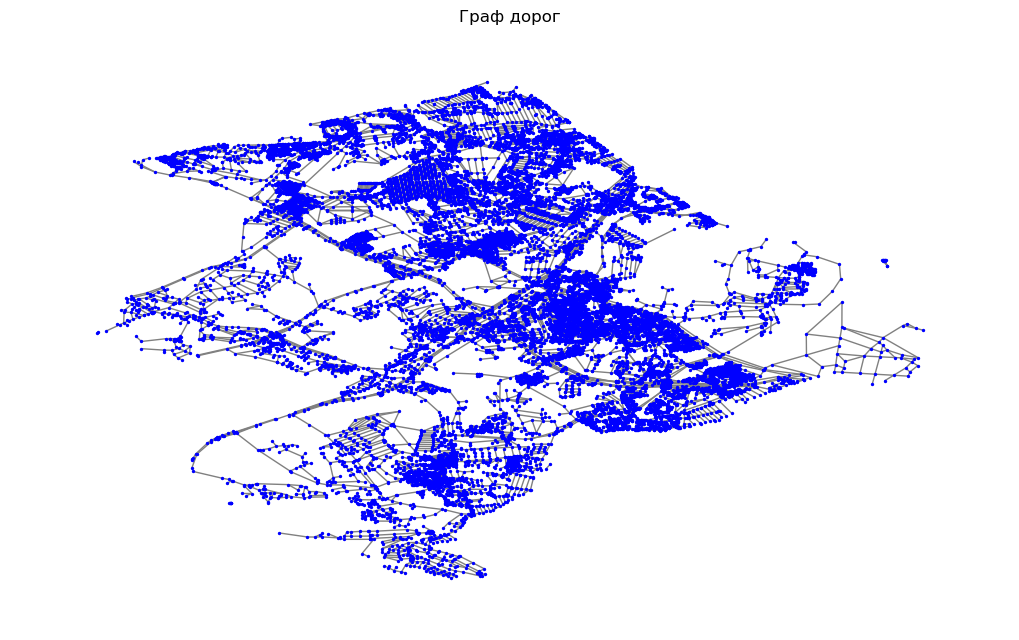

In [486]:
# ... (создание графа как в предыдущем примере) ...

# Отрисовка графа с сохранением расположения
plt.figure(figsize=(10, 6))

# Получение координат узлов из графа 
node_coords = {node: (data['x'], data['y']) for node, data in graph_strets_1.nodes(data=True)}

nx.draw(graph_strets_1, node_coords, with_labels=False, node_size=2, node_color='blue', edge_color='gray')

plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Граф дорог')
plt.show()

## Остановки

In [487]:
nearest_road = nearest_road[~nearest_road.index.duplicated(keep='first')]
nearest_road['time_to_ost'] = [0 for i in range(len(nearest_road))]
roads_near_houses['load'] = [0 for i in range(len(roads_near_houses))]
for house in range(len(nearest_road)):
    print(house)
    try:
        # 4. Определите начальный и конечный узлы
        f = gdf_streets_1.iloc[nearest_road.iloc[house]['index_road']]['geometry']
        start_node  = Point(f.xy[0][0], f.xy[1][0])  # Замените на координаты начального узла
        start_node = min(graph_strets_1.nodes, key=lambda node: start_node.distance(Point(graph_strets_1.nodes[node]['x'], graph_strets_1.nodes[node]['y'])))
        
        f = gdf_ost.iloc[nearest_road.iloc[house]['index_ost']]['geometry']
        end_node =Point(f.xy[0][0], f.xy[1][0])  # Замените на координаты конечного узла
        end_node = min(graph_strets_1.nodes, key=lambda node: end_node.distance(Point(graph_strets_1.nodes[node]['x'], graph_strets_1.nodes[node]['y'])))
        
        
        # 5. Найдите кратчайший путь
        shortest_path = nx.shortest_path(graph_strets_1, source=start_node, target=end_node, weight='length')
        
        # 6. Выведите кратчайший путь
        nearest_road.loc[house,'time_to_ost'] = nx.shortest_path_length(graph_strets_1, source=start_node, target=end_node, weight='length')/1.25/60 # расстояние делим на 1.25 м/c и на 60 секунд, получаем минуы
    
        for i in range(1,len(shortest_path)):
            start_coords = shortest_path[i-1]
            end_coords = shortest_path[i]
            point = Point((start_coords[0]+end_coords[0])/2, (start_coords[1]+end_coords[1])/2)  # Замените на координаты точки
            point_gdf = gpd.GeoDataFrame(geometry=[point])
            point_gdf.crs = "epsg:3857"
            # Используйте sjoin_nearest() для поиска ближайшей дороги
            nearest_road_2 = gpd.sjoin_nearest(point_gdf, gdf_streets_1, how='inner', distance_col='distance')
            roads_near_houses.loc[nearest_road_2.iloc[0]['index_right'],'load'] += nearest_road.iloc[house]['Apartments']*3*0.6*0.5
    except:
        nearest_road.loc[house,'time_to_ost'] = -1 

C:\Users\oklad\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


0


C:\Users\oklad\AppData\Local\Temp\ipykernel_35328\938233669.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.193471435772649' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  nearest_road.loc[house,'time_to_ost'] = nx.shortest_path_length(graph_strets_1, source=start_node, target=end_node, weight='length')/1.25/60 # расстояние делим на 1.25 м/c и на 60 секунд, получаем минуы
C:\Users\oklad\AppData\Local\Temp\ipykernel_35328\938233669.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '129.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  roads_near_houses.loc[nearest_road_2.iloc[0]['index_right'],'load'] += nearest_road.iloc[house]['Apartments']*3*0.6*0.5


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125


In [488]:
roads_near_houses[roads_near_houses['load']>0]['load'].max()

1173.6

In [489]:
roads_near_houses[roads_near_houses['load']>0]['load'].min()

48.6

In [490]:
roads_near_houses[roads_near_houses['load']>0]['load'].median()

275.4

In [491]:
nearest_road[nearest_road['time_to_ost']>0]['time_to_ost'].median()

7.883303884817789

In [492]:
nearest_road[nearest_road['time_to_ost']>0]['time_to_ost'].min()

1.2468376994967794

In [493]:
nearest_road[nearest_road['time_to_ost']>0]['time_to_ost'].max()

48.82206324034299

In [494]:
nearest_road['time_to_ost'].value_counts()

time_to_ost
-1.000000     25
 8.039629      2
 10.587638     2
 8.678188      2
 5.423785      2
              ..
 8.452365      1
 7.616790      1
 47.799571     1
 9.988768      1
 5.559838      1
Name: count, Length: 97, dtype: int64

## Метро + остановки

In [495]:
nearest_road['time_to_sub'] = [0 for i in range(len(nearest_road))]
for house in range(len(nearest_road)):
    print(house)
    try:
        # 4. Определите начальный и конечный узлы
        f = gdf_streets_1.iloc[nearest_road.iloc[house]['index_road']]['geometry']
        start_node  = Point(f.xy[0][0], f.xy[1][0])  # Замените на координаты начального узла
        start_node = min(graph_strets_1.nodes, key=lambda node: start_node.distance(Point(graph_strets_1.nodes[node]['x'], graph_strets_1.nodes[node]['y'])))
        
        f = gdf_metro.iloc[nearest_road.iloc[house]['index_ost']]['geometry']
        end_node =Point(f.xy[0][0], f.xy[1][0])  # Замените на координаты конечного узла
        end_node = min(graph_strets_1.nodes, key=lambda node: end_node.distance(Point(graph_strets_1.nodes[node]['x'], graph_strets_1.nodes[node]['y'])))
        
        
        # 5. Найдите кратчайший путь
        shortest_path = nx.shortest_path(graph_strets_1, source=start_node, target=end_node, weight='length')
        
        # 6. Выведите кратчайший путь
        nearest_road.loc[house,'time_to_sub'] = nx.shortest_path_length(graph_strets_1, source=start_node, target=end_node, weight='length')/1.25/60 # расстояние делим на 1.25 м/c и на 60 секунд, получаем минуы
    
        for i in range(1,len(shortest_path)):
            start_coords = shortest_path[i-1]
            end_coords = shortest_path[i]
            point = Point((start_coords[0]+end_coords[0])/2, (start_coords[1]+end_coords[1])/2)  # Замените на координаты точки
            point_gdf = gpd.GeoDataFrame(geometry=[point])
            point_gdf.crs = "epsg:3857"
            # Используйте sjoin_nearest() для поиска ближайшей дороги
            nearest_road_2 = gpd.sjoin_nearest(point_gdf, gdf_streets_1, how='inner', distance_col='distance')
            roads_near_houses.loc[nearest_road_2.iloc[0]['index_right'],'load'] += nearest_road.iloc[house]['Apartments']*3*0.6*0.5
    except:
        nearest_road.loc[house,'time_to_ost'] = -1 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65


C:\Users\oklad\AppData\Local\Temp\ipykernel_35328\2538555461.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.547612271035216' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  nearest_road.loc[house,'time_to_sub'] = nx.shortest_path_length(graph_strets_1, source=start_node, target=end_node, weight='length')/1.25/60 # расстояние делим на 1.25 м/c и на 60 секунд, получаем минуы


66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125


In [496]:
roads_near_houses[roads_near_houses['load']>0]['load'].max()

1902.6

In [497]:
roads_near_houses[roads_near_houses['load']>0]['load'].min()

48.6

In [498]:
roads_near_houses[roads_near_houses['load']>0]['load'].median()

275.4

In [499]:
nearest_road[nearest_road['time_to_ost']>0]['time_to_ost'].median()

5.059436213459987

In [500]:
nearest_road[nearest_road['time_to_ost']>0]['time_to_ost'].max()

9.648802406475735

In [501]:
nearest_road[nearest_road['time_to_ost']>0]['time_to_ost'].min()

1.4691098556163213

In [502]:
nearest_road['time_to_ost'].value_counts()

time_to_ost
-1.000000    116
 8.039629      2
 3.286619      1
 1.469110      1
 2.295292      1
 7.883304      1
 9.648802      1
 4.559034      1
 1.739676      1
 5.559838      1
Name: count, dtype: int64

# Третья очередь

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 3 entries, 0 to 2
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Type           3 non-null      object  
 1   Purpose        3 non-null      object  
 2   Elevation      3 non-null      int64   
 3   Entrances      0 non-null      object  
 4   Apartments     0 non-null      object  
 5   District       3 non-null      object  
 6   Street         3 non-null      object  
 7   Number         3 non-null      object  
 8   geometry       3 non-null      geometry
 9   index_road     3 non-null      int64   
 10  ST_NAME        0 non-null      object  
 11  ST_TYP_BEF     0 non-null      object  
 12  ST_NM_BASE     0 non-null      object  
 13  ROAD_CATEG     3 non-null      object  
 14  RoadDirect     3 non-null      object  
 15  RbndStght      1 non-null      float64 
 16  RbndBck        1 non-null      float64 
 17  Width          1 non-null      float

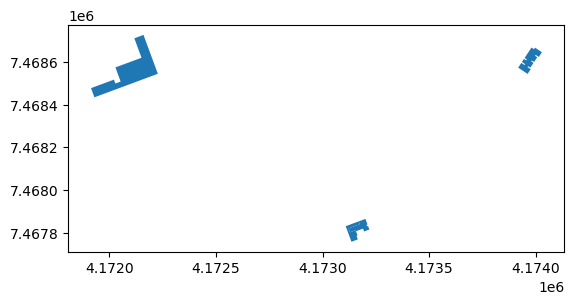

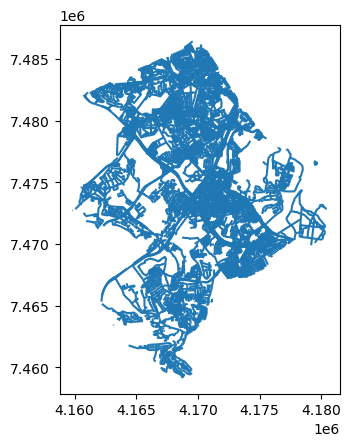

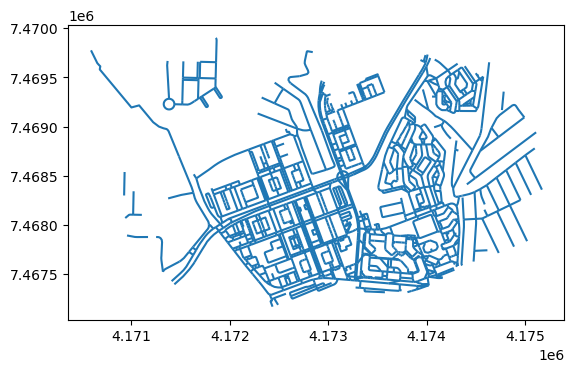

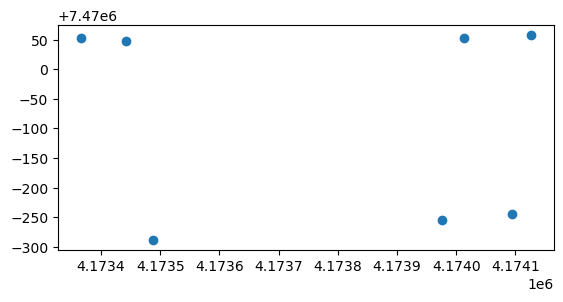

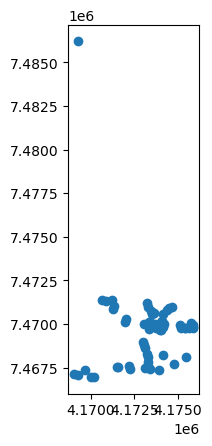

In [503]:
shapefile_path = "Векторные данные/House_3очередь_ЖК.shp"

# Чтение Shapefile
gdf_house_1 = gpd.read_file(shapefile_path)
gdf_house_1.plot()

shapefile_path = "Векторные данные/Streets_3очередь.shp"

# Чтение Shapefile
gdf_streets_1 = gpd.read_file(shapefile_path)
gdf_streets_1.plot()

max_distance = 1000  # В метрах

#  Используйте  `houses_gdf.buffer(max_distance)`  для  создания  буфера  вокруг  каждого  дома
houses_buffer = gdf_house_1.buffer(max_distance)

#  Проверьте  пересечение  дорог  с  буфером
roads_near_houses = gdf_streets_1[gdf_streets_1.intersects(houses_buffer.unary_union)]
roads_near_houses.plot()

nearest_road = gpd.sjoin_nearest(gdf_house_1, roads_near_houses, distance_col='distance_road')
nearest_road = nearest_road.rename(columns={'index_right': 'index_road'})
nearest_road.info()

shapefile_path = "Векторные данные/Выходы_метро.shp"

# Чтение Shapefile
gdf_metro = gpd.read_file(shapefile_path)
gdf_metro.plot()

nearest_road = gpd.sjoin_nearest(nearest_road, gdf_metro, distance_col='distance_metro')
nearest_road = nearest_road.rename(columns={'index_right': 'index_metro'})
nearest_road.info()


shapefile_path = "Векторные данные/Остановки_ОТ.shp"

# Чтение Shapefile
gdf_ost = gpd.read_file(shapefile_path)
gdf_ost.plot()


nearest_road = gpd.sjoin_nearest(nearest_road, gdf_ost, distance_col='distance_ost')
nearest_road = nearest_road.rename(columns={'index_right': 'index_ost'})
nearest_road.info()

In [504]:
graph_strets_1 = nx.Graph()

# Добавление узлов и ребер в граф
for i, row in gdf_streets_1.iterrows():
    # Получаем координаты начальной и конечной точек линии
    start_coords = row.geometry.coords[0]
    end_coords = row.geometry.coords[-1]

    # Добавляем узлы в граф
    graph_strets_1.add_node(start_coords, x=start_coords[0], y=start_coords[1])
    graph_strets_1.add_node(end_coords, x=end_coords[0], y=end_coords[1])

    # Добавляем ребро в граф
    graph_strets_1.add_edge(start_coords, end_coords, length=row.geometry.length)  #  Длина ребра
    #  (Можно добавить другие атрибуты, например, тип дороги, ограничение скорости)

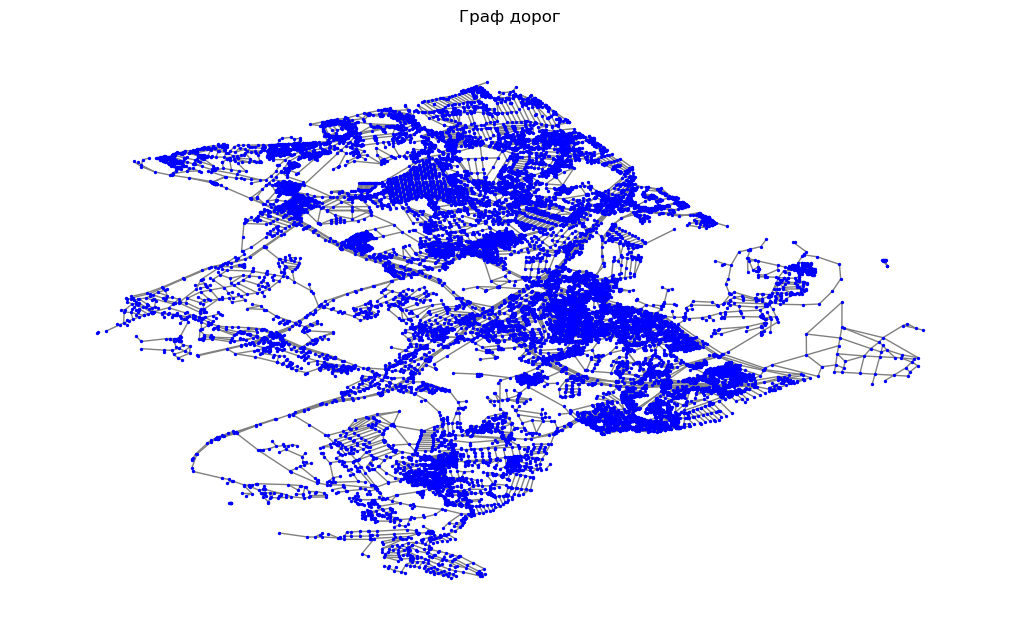

In [505]:
# ... (создание графа как в предыдущем примере) ...

# Отрисовка графа с сохранением расположения
plt.figure(figsize=(10, 6))

# Получение координат узлов из графа 
node_coords = {node: (data['x'], data['y']) for node, data in graph_strets_1.nodes(data=True)}

nx.draw(graph_strets_1, node_coords, with_labels=False, node_size=2, node_color='blue', edge_color='gray')

plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Граф дорог')
plt.show()

## Остановки

In [506]:
nearest_road = nearest_road[~nearest_road.index.duplicated(keep='first')]
nearest_road['time_to_ost'] = [0 for i in range(len(nearest_road))]
roads_near_houses['load'] = [0 for i in range(len(roads_near_houses))]
for house in range(len(nearest_road)):
    print(house)
    try:
        # 4. Определите начальный и конечный узлы
        f = gdf_streets_1.iloc[nearest_road.iloc[house]['index_road']]['geometry']
        start_node  = Point(f.xy[0][0], f.xy[1][0])  # Замените на координаты начального узла
        start_node = min(graph_strets_1.nodes, key=lambda node: start_node.distance(Point(graph_strets_1.nodes[node]['x'], graph_strets_1.nodes[node]['y'])))
        
        f = gdf_ost.iloc[nearest_road.iloc[house]['index_ost']]['geometry']
        end_node =Point(f.xy[0][0], f.xy[1][0])  # Замените на координаты конечного узла
        end_node = min(graph_strets_1.nodes, key=lambda node: end_node.distance(Point(graph_strets_1.nodes[node]['x'], graph_strets_1.nodes[node]['y'])))
        
        
        # 5. Найдите кратчайший путь
        shortest_path = nx.shortest_path(graph_strets_1, source=start_node, target=end_node, weight='length')
        
        # 6. Выведите кратчайший путь
        nearest_road.loc[house,'time_to_ost'] = nx.shortest_path_length(graph_strets_1, source=start_node, target=end_node, weight='length')/1.25/60 # расстояние делим на 1.25 м/c и на 60 секунд, получаем минуы
    
        for i in range(1,len(shortest_path)):
            start_coords = shortest_path[i-1]
            end_coords = shortest_path[i]
            point = Point((start_coords[0]+end_coords[0])/2, (start_coords[1]+end_coords[1])/2)  # Замените на координаты точки
            point_gdf = gpd.GeoDataFrame(geometry=[point])
            point_gdf.crs = "epsg:3857"
            # Используйте sjoin_nearest() для поиска ближайшей дороги
            nearest_road_2 = gpd.sjoin_nearest(point_gdf, gdf_streets_1, how='inner', distance_col='distance')
            roads_near_houses.loc[nearest_road_2.iloc[0]['index_right'],'load'] += nearest_road.iloc[house]['Apartments']*3*0.6*0.5
    except:
        nearest_road.loc[house,'time_to_ost'] = -1 

C:\Users\oklad\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


0


C:\Users\oklad\AppData\Local\Temp\ipykernel_35328\938233669.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.97486532303162' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  nearest_road.loc[house,'time_to_ost'] = nx.shortest_path_length(graph_strets_1, source=start_node, target=end_node, weight='length')/1.25/60 # расстояние делим на 1.25 м/c и на 60 секунд, получаем минуы


1
2


In [507]:
roads_near_houses[roads_near_houses['load']>0]['load'].max()

nan

In [508]:
roads_near_houses[roads_near_houses['load']>0]['load'].min()

nan

In [509]:
roads_near_houses[roads_near_houses['load']>0]['load'].median()

nan